In [4]:
import polars as pl
from pathlib import Path
from pybedtools import BedTool
import pandas as pd

In [5]:
chm13v2 = Path("/storage/group/izg5139/default/nicole/g4_t2t_analysis/datasets/chm13v2.0.fa")
chm13v2.is_file()

False

In [6]:
mutation_paths = {file.name.split('.')[-2].split("_")[-1]: file for file in Path("/storage/group/izg5139/default/nicole/g4_t2t/mutations/").glob("*.bed")}
mutation_paths

{}

In [ ]:
subs_df = pd.read_table("/storage/group/izg5139/default/nicole/pangenome_extractions/hprc-v1.1-mc-chm13.vcfbub.a100k.wave.exploded.vcf.gz")
subs_df

,seqID,start,end,mutation,general_mut,subvariants,mut_id,AF,LEN,TYPE,AC,AN,NS,reference,variant
0,chr1,0,1,ins,ins,1,b88de73f,0.142857,151.0,ins,1,7,5,C,CCACCTAACCCTAACCCTACCTAACCCTAACCCTAACCCTAACCCT...
1,chr1,0,12,smalldel,del,1,1423b2ef,0.285714,11.0,del,2,7,5,CACCCTAAACCC,C
2,chr1,0,19,smalldel,del,1,7c73a72c,0.285714,18.0,del,2,7,5,CACCCTAAACCCTAACCCC,C
3,chr1,0,81,del,del,1,b56421e9,0.142857,80.0,del,1,7,5,CACCCTAAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAA...,C
4,chr1,5,6,ins,ins,1,0fafc81d,0.142857,417.0,ins,1,7,5,T,TTCCCCCCCACCCCCACCCCCACCCCCACCCCCACCCCCTCCCCCA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31122840,chrY,26673145,26673146,snp,snp,1,467130a7,0.222222,1.0,snp,2,9,9,G,T
31122841,chrY,26673150,26673151,snp,snp,1,f0d38f85,0.111111,1.0,snp,1,9,9,G,T
31122842,chrY,26673209,26673210,ins,ins,1,c757e568,0.200000,9040.0,ins,1,5,5,A,AGTGGACTGGAGTGCAGAGGAATGGAGTGGAGTGAAGTCCAGTTGA...
31122843,chrY,26673209,26673210,ins,ins,1,ccd836a4,0.400000,9041.0,ins,2,5,5,A,AGTGGACTGGAGTGCAGAGGAATGGAGTGGAGTGAAGTCCAGTTGA...


In [9]:
subs_df = subs_df[subs_df["mutation"] == "snp"].reset_index(drop=True)
subs_df.head()

,seqID,start,end,mutation,general_mut,subvariants,mut_id,AF,LEN,TYPE,AC,AN,NS,reference,variant
0,chr1,8,9,snp,snp,1,20549127,0.142857,1.0,snp,1,7,5,A,C
1,chr1,17,18,snp,snp,1,8de0a655,0.285714,1.0,snp,2,7,5,C,A
2,chr1,18,19,snp,snp,1,9109e651,0.142857,1.0,snp,1,7,5,C,A
3,chr1,21,22,snp,snp,1,e746e965,0.285714,1.0,snp,2,7,5,A,C
4,chr1,25,26,snp,snp,1,bc8c8cad,0.285714,1.0,snp,2,7,5,T,A


In [10]:
subs_df = pl.from_pandas(subs_df)
subs_df

seqID,start,end,mutation,general_mut,subvariants,mut_id,AF,LEN,TYPE,AC,AN,NS,reference,variant
str,i64,i64,str,str,i64,str,f64,f64,str,i64,i64,i64,str,str
"""chr1""",8,9,"""snp""","""snp""",1,"""20549127""",0.142857,1.0,"""snp""",1,7,5,"""A""","""C"""
"""chr1""",17,18,"""snp""","""snp""",1,"""8de0a655""",0.285714,1.0,"""snp""",2,7,5,"""C""","""A"""
"""chr1""",18,19,"""snp""","""snp""",1,"""9109e651""",0.142857,1.0,"""snp""",1,7,5,"""C""","""A"""
"""chr1""",21,22,"""snp""","""snp""",1,"""e746e965""",0.285714,1.0,"""snp""",2,7,5,"""A""","""C"""
"""chr1""",25,26,"""snp""","""snp""",1,"""bc8c8cad""",0.285714,1.0,"""snp""",2,7,5,"""T""","""A"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrY""",26673121,26673122,"""snp""","""snp""",1,"""3940cfb3""",0.888889,null,null,8,9,9,"""G""","""T"""
"""chrY""",26673134,26673135,"""snp""","""snp""",1,"""085823a8""",0.222222,1.0,"""snp""",2,9,9,"""A""","""C"""
"""chrY""",26673145,26673146,"""snp""","""snp""",1,"""2254ef72""",0.111111,1.0,"""snp""",1,9,9,"""G""","""A"""


In [11]:
import sys
sys.path.insert(0, "/storage/group/izg5139/default/nicole/g4_t2t_analysis/scripts")
from gff_utils import Expander
from constants import Constants

e = Expander(window_size=1)
df_expanded = e.expand_windows(subs_df.with_columns(pl.lit("+").alias("strand")), 
                               loci="start")\
                .with_columns(length=(pl.col("end") - pl.col("start")))\
                .filter(pl.col("length") == 3)
df_expanded

seqID,start,end,mutation,general_mut,subvariants,mut_id,AF,LEN,TYPE,AC,AN,NS,reference,variant,strand,length
str,i64,i64,str,str,i64,str,f64,f64,str,i64,i64,i64,str,str,str,i64
"""chr1""",7,10,"""snp""","""snp""",1,"""20549127""",0.142857,1.0,"""snp""",1,7,5,"""A""","""C""","""+""",3
"""chr1""",16,19,"""snp""","""snp""",1,"""8de0a655""",0.285714,1.0,"""snp""",2,7,5,"""C""","""A""","""+""",3
"""chr1""",17,20,"""snp""","""snp""",1,"""9109e651""",0.142857,1.0,"""snp""",1,7,5,"""C""","""A""","""+""",3
"""chr1""",20,23,"""snp""","""snp""",1,"""e746e965""",0.285714,1.0,"""snp""",2,7,5,"""A""","""C""","""+""",3
"""chr1""",24,27,"""snp""","""snp""",1,"""bc8c8cad""",0.285714,1.0,"""snp""",2,7,5,"""T""","""A""","""+""",3
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrY""",26673120,26673123,"""snp""","""snp""",1,"""3940cfb3""",0.888889,null,null,8,9,9,"""G""","""T""","""+""",3
"""chrY""",26673133,26673136,"""snp""","""snp""",1,"""085823a8""",0.222222,1.0,"""snp""",2,9,9,"""A""","""C""","""+""",3
"""chrY""",26673144,26673147,"""snp""","""snp""",1,"""2254ef72""",0.111111,1.0,"""snp""",1,9,9,"""G""","""A""","""+""",3


In [12]:
import pandas as pd

g4_df = pd.read_table(Constants.G4HUNTER.value)
g4_bed = BedTool.from_dataframe(g4_df.drop(columns=['NBR'])).sort()\
                                    .merge(
                                            c=["2", "4"], 
                                            o=["collapse", "collapse"]
                                )

In [13]:
merged_g4 = pl.read_csv(
                    g4_bed.fn, 
                    has_header=False, 
                    separator="\t", 
                    new_columns=["seqID", "start", "end", "many_starts", "many_sequences"]
)
merged_g4

seqID,start,end,many_starts,many_sequences
str,i64,i64,str,str
"""chr1""",0,1362,"""0,22,28,60,66,72,78,84,90,96,1…","""caccctaaaccctaacccctaaccctaacc…"
"""chr1""",1368,1539,"""1368,1374,1380,1386,1392,1398,…","""ccctaaccctaaccctaaccctaaccc,cc…"
"""chr1""",1543,1629,"""1543,1549,1554,1560,1566,1572,…","""ccctaaccctaaccctaaccctaaccc,cc…"
"""chr1""",1640,1877,"""1640,1646,1651,1753,1759,1765,…","""ccctaaccctaaccctaaccctaaccc,cc…"
"""chr1""",1929,1974,"""1929,1935,1941,1947""","""ccctaaccctaaccctaaccctaaccc,cc…"
…,…,…,…,…
"""chrY""",62455563,62455626,"""62455563,62455569,62455575,624…","""gggttagggttagggttagggttaggg,gg…"
"""chrY""",62455637,62455694,"""62455637,62455643,62455649,624…","""gggttagggttagggttagggttaggg,gg…"
"""chrY""",62455705,62455762,"""62455705,62455711,62455717,624…","""gggttagggttagggttagggttaggg,gg…"


In [14]:
merged_g4_df = []

for row in merged_g4.iter_rows(named=True):
    seqID = row['seqID']
    start = int(row['start'])
    end = int(row['end'])
    total_len = end - start
    
    many_starts = list(map(int, row["many_starts"].split(",")))
    many_sequences = row["many_sequences"].split(",")
    merged_sequence = ''
    
    for sequence, (start_p, start_n) in zip(many_sequences, zip(many_starts, many_starts[1:])):
        merged_sequence += sequence[:start_n - start_p]
    merged_sequence += many_sequences[-1]
    assert len(merged_sequence) == total_len
    merged_g4_df.append(
                    {"seqID": seqID,
                     "start": start,
                     "end": end,
                     "sequence": merged_sequence,
                     "length": total_len,
                    })
    
merged_g4_df = pl.DataFrame(merged_g4_df)
merged_g4_df

seqID,start,end,sequence,length
str,i64,i64,str,i64
"""chr1""",0,1362,"""caccctaaaccctaacccctaaccctaacc…",1362
"""chr1""",1368,1539,"""ccctaaccctaaccctaaccctaaccctaa…",171
"""chr1""",1543,1629,"""ccctaaccctaaccctaaccctaaccctaa…",86
"""chr1""",1640,1877,"""ccctaaccctaaccctaaccctaaccctaa…",237
"""chr1""",1929,1974,"""ccctaaccctaaccctaaccctaaccctaa…",45
…,…,…,…,…
"""chrY""",62455563,62455626,"""gggttagggttagggttagggttagggtta…",63
"""chrY""",62455637,62455694,"""gggttagggttagggttagggttagggtta…",57
"""chrY""",62455705,62455762,"""gggttagggttagggttagggttagggtta…",57


In [15]:
human_chromosomes = pl.read_csv(Constants.GENOME_SIZE.value, 
                                  has_header=False,
                                  separator="\t",
                                  new_columns=["seqID", "size"])
human_chromosomes.head()

seqID,size
str,i64
"""chr1""",248387328
"""chr2""",242696752
"""chr3""",201105948
"""chr4""",193574945
"""chr5""",182045439


In [16]:
merged_g4_df = merged_g4_df.join(
                            human_chromosomes, 
                            on="seqID", 
                            how="left"
                        )
merged_g4_df.head()

seqID,start,end,sequence,length,size
str,i64,i64,str,i64,i64
"""chr1""",0,1362,"""caccctaaaccctaacccctaaccctaacc…",1362,248387328
"""chr1""",1368,1539,"""ccctaaccctaaccctaaccctaaccctaa…",171,248387328
"""chr1""",1543,1629,"""ccctaaccctaaccctaaccctaaccctaa…",86,248387328
"""chr1""",1640,1877,"""ccctaaccctaaccctaaccctaaccctaa…",237,248387328
"""chr1""",1929,1974,"""ccctaaccctaaccctaaccctaaccctaa…",45,248387328


In [17]:
import numpy as np

merged_g4_df = merged_g4_df.with_columns(
                                    pl.max_horizontal(0, pl.col("start") - 1).alias("start_exp"),
                                    pl.min_horizontal(pl.col("size"), pl.col("end") + 1).alias("end_exp")
                        )
merged_g4_df.head()

seqID,start,end,sequence,length,size,start_exp,end_exp
str,i64,i64,str,i64,i64,i64,i64
"""chr1""",0,1362,"""caccctaaaccctaacccctaaccctaacc…",1362,248387328,0,1363
"""chr1""",1368,1539,"""ccctaaccctaaccctaaccctaaccctaa…",171,248387328,1367,1540
"""chr1""",1543,1629,"""ccctaaccctaaccctaaccctaaccctaa…",86,248387328,1542,1630
"""chr1""",1640,1877,"""ccctaaccctaaccctaaccctaaccctaa…",237,248387328,1639,1878
"""chr1""",1929,1974,"""ccctaaccctaaccctaaccctaaccctaa…",45,248387328,1928,1975


In [18]:
g4_bed = BedTool.from_dataframe(merged_g4_df.select(["seqID", "start_exp", "end_exp", "sequence"]).to_pandas()).sort()

In [19]:
g4_seq_expanded = g4_bed.sequence(fi=Constants.FASTA.value, tab=True, name=True)

In [20]:
new_lines = []
with open(g4_seq_expanded.seqfn, mode="r") as f:
    for line in f:
        line = line.strip().split("\t")
        data = line[0]
        seqID = data.split("::")[1].split(":")[0]
        coords = data.split(":")[-1]
        start, end = coords.split("-")
        start = int(start)
        end = int(end)
        sequence = line[1].lower()
        
        new_lines.append({
                    "seqID": seqID,
                    "start": start,
                    "end": end,
                    "sequence": sequence,
        })
        
g4_df_exp = pd.DataFrame(new_lines)
# g4_bed = BedTool.from_dataframe(g4_df_exp).sort()
g4_df_exp

,seqID,start,end,sequence
0,chr1,0,1363,caccctaaaccctaacccctaaccctaaccctaaccctaaccctaa...
1,chr1,1367,1540,accctaaccctaaccctaaccctaaccctaaccctaaccctaaccc...
2,chr1,1542,1630,accctaaccctaaccctaaccctaaccctaaccctaccctaaccct...
3,chr1,1639,1878,accctaaccctaaccctaaccctaaccctaaccctacccctacccc...
4,chr1,1928,1975,accctaaccctaaccctaaccctaaccctaaccctaaccctaaccct
...,...,...,...,...
1465184,chrY,62455562,62455627,agggttagggttagggttagggttagggttagggttagggttaggg...
1465185,chrY,62455636,62455695,agggttagggttagggttagggttagggttagggttagggttaggg...
1465186,chrY,62455704,62455763,agggttagggttagggttagggttagggttagggttagggttaggg...
1465187,chrY,62455772,62455831,agggttagggttagggttagggttagggttagggttagggttaggg...


In [21]:
from collections import defaultdict
from tqdm import tqdm
from Bio.Seq import Seq
# count total trinucleotides

base_trinucleotide_counts = defaultdict(int)
expanded_sequences = list(g4_df_exp["sequence"])

for sequence in tqdm(expanded_sequences):
    sequence = sequence.lower()
    if sequence.count("g") < sequence.count("c"):
        sequence = str(Seq(sequence).reverse_complement())
    
    for i in range(len(sequence)-2):
        trinucleotide = sequence[i:i+3]
        rev_comp = str(Seq(trinucleotide).reverse_complement())
        if trinucleotide > rev_comp:
            trinucleotide = rev_comp
            
        base_trinucleotide_counts[trinucleotide] += 1
        
base_trinucleotide_counts = pd.Series(base_trinucleotide_counts).to_frame('base_g4_tri_counts')\
                                                                .sort_values(
                                                                            by=['base_g4_tri_counts'],
                                                                            ascending=False
                                                                    )
base_trinucleotide_counts

100%|██████████| 1465189/1465189 [01:36<00:00, 15135.85it/s]


,base_g4_tri_counts
ccc,9592299
agg,4014274
gga,3839437
cca,3405173
ctc,3294378
cac,2389583
gcc,2383956
acc,2329719
cag,2240748
aag,1548432


In [56]:
df_expanded.shape

(22556880, 32)

In [22]:
snp_bed = BedTool.from_dataframe(df_expanded.select(["seqID", "start", "end", "reference", "variant"]).to_pandas()).sort()
snp_bed

<BedTool(/tmp/pybedtools.gsbznaqu.tmp)>

In [23]:
snp_bed_seq = snp_bed.sequence(fi=str(chm13v2), 
                               tab=True, 
                               name=True)
snp_bed_seq

<BedTool(/tmp/pybedtools.gsbznaqu.tmp)>

In [24]:
from collections import defaultdict

trinucleotides = [] # defaultdict(int)
transitions = defaultdict(lambda: dict)

with open(snp_bed.seqfn, mode="r") as f:
    for line in f:
        line = line.strip().split("\t")
        data = line[0]
        ref = data.split('::')[0]
        seqID = data.split('::')[1].split(':')[0]
        if seqID == "chrY":
            continue
        coords = data.split(':')[-1]
        x, y = coords.split('-')
        
        sequence = line[1].lower()
        assert sequence[1] == ref.lower()
        trinucleotides.append(
                        {
                         "seqID": seqID,
                         "start": x,
                         "end": y,
                         "ref": ref,
                         "sequence": sequence,
                        }
        )
        
trinucleotides = pl.DataFrame(trinucleotides)
trinucleotides

seqID,start,end,ref,sequence
str,str,str,str,str
"""chr1""","""7""","""10""","""A""","""aac"""
"""chr1""","""16""","""19""","""C""","""ccc"""
"""chr1""","""17""","""20""","""C""","""cct"""
"""chr1""","""20""","""23""","""A""","""aac"""
"""chr1""","""24""","""27""","""T""","""cta"""
…,…,…,…,…
"""chrX""","""154259546""","""154259549""","""T""","""gtt"""
"""chrX""","""154259547""","""154259550""","""T""","""tta"""
"""chrX""","""154259553""","""154259556""","""T""","""tta"""


In [25]:
from Bio.Seq import Seq

def replace_with_complement(seq: str):
    seq = seq.lower()
    rev_comp = str(Seq(seq).reverse_complement())
    if seq <= rev_comp:
        return seq
    return rev_comp

nucleotides = "agct"
# trinuc = ''.join()
    
trinucleotides_enriched = trinucleotides.with_columns(
                                    pl.col("start").cast(pl.Int32),
                                    pl.col("end").cast(pl.Int32)
                                ).join(
                                        df_expanded.select(["seqID", "start", "end", "reference", "variant"]),
                                        how="left",
                                        on=["seqID", "start", "end"]
)\
        .with_columns(
                    pl.col("sequence").map_elements(replace_with_complement, return_dtype=str).alias("canonical_sequence")
        )
trinucleotides_enriched

seqID,start,end,ref,sequence,reference,variant,canonical_sequence
str,i32,i32,str,str,str,str,str
"""chr1""",7,10,"""A""","""aac""","""A""","""C""","""aac"""
"""chr1""",16,19,"""C""","""ccc""","""C""","""A""","""ccc"""
"""chr1""",17,20,"""C""","""cct""","""C""","""A""","""agg"""
"""chr1""",20,23,"""A""","""aac""","""A""","""C""","""aac"""
"""chr1""",24,27,"""T""","""cta""","""T""","""A""","""cta"""
…,…,…,…,…,…,…,…
"""chrX""",154259546,154259549,"""T""","""gtt""","""T""","""G""","""aac"""
"""chrX""",154259547,154259550,"""T""","""tta""","""T""","""A""","""taa"""
"""chrX""",154259553,154259556,"""T""","""tta""","""T""","""G""","""taa"""


In [26]:
len(set(trinucleotides_enriched['sequence']))

64

In [27]:
len(set(trinucleotides_enriched['canonical_sequence']))

32

In [28]:
trinucleotides_enriched = trinucleotides_enriched.with_columns(
                                        (pl.col("sequence").str.slice(0, 1) + pl.col("variant").str.to_lowercase() + pl.col("sequence").str.slice(2, 1)).alias("mutant"),
                                        pl.col("sequence").str.slice(1, 1).str.to_uppercase().alias("ref_fetched")
)
trinucleotides_enriched

seqID,start,end,ref,sequence,reference,variant,canonical_sequence,mutant,ref_fetched
str,i32,i32,str,str,str,str,str,str,str
"""chr1""",7,10,"""A""","""aac""","""A""","""C""","""aac""","""acc""","""A"""
"""chr1""",16,19,"""C""","""ccc""","""C""","""A""","""ccc""","""cac""","""C"""
"""chr1""",17,20,"""C""","""cct""","""C""","""A""","""agg""","""cat""","""C"""
"""chr1""",20,23,"""A""","""aac""","""A""","""C""","""aac""","""acc""","""A"""
"""chr1""",24,27,"""T""","""cta""","""T""","""A""","""cta""","""caa""","""T"""
…,…,…,…,…,…,…,…,…,…
"""chrX""",154259546,154259549,"""T""","""gtt""","""T""","""G""","""aac""","""ggt""","""T"""
"""chrX""",154259547,154259550,"""T""","""tta""","""T""","""A""","""taa""","""taa""","""T"""
"""chrX""",154259553,154259556,"""T""","""tta""","""T""","""G""","""taa""","""tga""","""T"""


In [29]:
trinucleotides_enriched.filter(pl.col("ref_fetched") != pl.col("reference"))

seqID,start,end,ref,sequence,reference,variant,canonical_sequence,mutant,ref_fetched
str,i32,i32,str,str,str,str,str,str,str


In [30]:
total_counts = Path("/storage/group/izg5139/default/nicole/g4_t2t_analysis/datasets/chm13v2.fasta_3mers.txt")
total_counts_df = pl.read_csv(
                                total_counts, 
                                separator=" ",
                                has_header=False,
                                new_columns=["canonical_sequence", "counts"]
)\
        .with_columns(pl.col("canonical_sequence").str.to_lowercase())

total_counts_df

canonical_sequence,counts
str,i64
"""aaa""",234131702
"""aac""",90301575
"""aag""",121701801
"""aat""",163578363
"""aca""",124088380
…,…
"""gcc""",3845366
"""gga""",103219206
"""gta""",70078909


In [74]:
!squeue -u nmc6088

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          35620664  sla-prio submit_g  nmc6088 PD       0:00      1 (AssocGrpMemLimit)
          35538007  sla-prio RoarColl  nmc6088  R 2-08:56:53      1 p-sc-2045


In [32]:
trinucleotides_mutated = trinucleotides_enriched\
                                    .group_by("canonical_sequence")\
                                    .agg(pl.col("reference").count().alias("totalMutated"))\
                        .join(
                            total_counts_df,
                            on="canonical_sequence",
                            how="left"
            )\
            .with_columns(
                        (pl.col("totalMutated") / pl.col("counts")).alias("mutation_bias")
).sort(['mutation_bias'], descending=True)



trinucleotides_mutated

canonical_sequence,totalMutated,counts,mutation_bias
str,u32,i64,f64
"""gcc""",575756,3845366,0.149727
"""acg""",1197675,16502152,0.072577
"""ccg""",1025396,14322076,0.071595
"""cgc""",887884,14863494,0.059736
"""cga""",712311,13422601,0.053068
…,…,…,…
"""caa""",539234,117707971,0.004581
"""aag""",542510,121701801,0.004458
"""ctc""",413549,103263136,0.004005


## Find Trinucleotide Enrichment in Mutations

In [33]:
trinucleotides.head()

seqID,start,end,ref,sequence
str,str,str,str,str
"""chr1""","""7""","""10""","""A""","""aac"""
"""chr1""","""16""","""19""","""C""","""ccc"""
"""chr1""","""17""","""20""","""C""","""cct"""
"""chr1""","""20""","""23""","""A""","""aac"""
"""chr1""","""24""","""27""","""T""","""cta"""


In [34]:
trinucleotides.shape

(22528556, 5)

In [77]:
trinucleotides_bed = BedTool.from_dataframe(trinucleotides.to_pandas()).sort()

The main logic here is that trinucleotide counts will be mapped to G4 sequences if they have 100% overlap, i.e. they are contained within the G4 sequence.

Thus, we will fetch the mutated trinucleotides that are a part of a G4 sequence.

In [104]:
g4_df_exp_bed = BedTool.from_dataframe(g4_df_exp).sort()

In [81]:
mutated_tri_mapped_to_g4 = pl.read_csv(
                            trinucleotides_bed.intersect(g4_bed, f=0.7, u=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=list(trinucleotides.columns) + ["chromosome", "g4_start", "g4_end", "g4_sequence", "overlap"]
)
mutated_tri_mapped_to_g4

ShapeError: 10 column names provided for a DataFrame of width 5

~ Alternative approach, map Substitutions to G-Quadruplex, and we fetch the different mutated combinations.

In [84]:
g4_bed.count()

1465189

In [105]:
g4_to_snp = pl.read_csv(
                            g4_df_exp_bed.intersect(snp_bed, wo=True).fn,
                            has_header=False,
                            separator="\t",
                            new_columns=["seqID", "start", "end", "sequence"] + ["chromosome", "snp_start", "snp_end", "ref", "var", "overlap"]
)
g4_to_snp

seqID,start,end,sequence,chromosome,snp_start,snp_end,ref,var,overlap
str,i64,i64,str,str,i64,i64,str,str,i64
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",7,10,"""A""","""C""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",16,19,"""C""","""A""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",17,20,"""C""","""A""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",20,23,"""A""","""C""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",24,27,"""T""","""A""",3
…,…,…,…,…,…,…,…,…,…
"""chrY""",26656920,26656961,"""cgtatggggtaaagagtggggatgaggagg…","""chrY""",26656955,26656958,"""T""","""C""",3
"""chrY""",26658481,26658508,"""gccacccaataaacccctacattccct""","""chrY""",26658487,26658490,"""T""","""A""",3
"""chrY""",26661877,26661908,"""aataaccactcccagccccatcacccaagt…","""chrY""",26661896,26661899,"""G""","""A""",3


In [106]:
g4_to_snp = g4_to_snp.filter(pl.col("overlap") == 3)
g4_to_snp

seqID,start,end,sequence,chromosome,snp_start,snp_end,ref,var,overlap
str,i64,i64,str,str,i64,i64,str,str,i64
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",7,10,"""A""","""C""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",16,19,"""C""","""A""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",17,20,"""C""","""A""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",20,23,"""A""","""C""",3
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",24,27,"""T""","""A""",3
…,…,…,…,…,…,…,…,…,…
"""chrY""",26656920,26656961,"""cgtatggggtaaagagtggggatgaggagg…","""chrY""",26656955,26656958,"""T""","""C""",3
"""chrY""",26658481,26658508,"""gccacccaataaacccctacattccct""","""chrY""",26658487,26658490,"""T""","""A""",3
"""chrY""",26661877,26661908,"""aataaccactcccagccccatcacccaagt…","""chrY""",26661896,26661899,"""G""","""A""",3


In [107]:
g4_to_snp.filter(pl.col("start") > pl.col("snp_start"))

seqID,start,end,sequence,chromosome,snp_start,snp_end,ref,var,overlap
str,i64,i64,str,str,i64,i64,str,str,i64


In [108]:
compartments_df = pd.read_table("/storage/group/izg5139/default/nicole/g4_t2t/datasets/compartments_T2T_coding_protein_coding.csv")
compartments_bed = BedTool.from_dataframe(compartments_df).sort()
compartments_bed.count()

2013119

In [109]:
g4_to_snp_bed = BedTool.from_dataframe(g4_to_snp.to_pandas()).sort()

In [110]:
g4_to_snp_compartments = pl.read_csv(
                            g4_to_snp_bed.intersect(compartments_bed, f=1.0, wo=True).fn,
                            has_header=False, 
                            separator="\t", 
                            new_columns=["seqID", "start", "end", "sequence", "chrom", "snp_start", "snp_end", "ref", "var", "snp_overlap", "chromosome", "comp_start", "comp_end", "compartment", "biotype", "overlap"]
)
g4_to_snp_compartments

seqID,start,end,sequence,chrom,snp_start,snp_end,ref,var,snp_overlap,chromosome,comp_start,comp_end,compartment,biotype,overlap
str,i64,i64,str,str,i64,i64,str,str,i64,str,i64,i64,str,str,i64
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",900,903,"""C""","""G""",3,"""chr1""",0,3000,"""Telomere""",""".""",1363
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",823,826,"""A""","""C""",3,"""chr1""",0,3000,"""Telomere""",""".""",1363
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",827,830,"""T""","""C""",3,"""chr1""",0,3000,"""Telomere""",""".""",1363
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",827,830,"""T""","""G""",3,"""chr1""",0,3000,"""Telomere""",""".""",1363
"""chr1""",0,1363,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",832,835,"""C""","""G""",3,"""chr1""",0,3000,"""Telomere""",""".""",1363
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrY""",25606306,25606335,"""aatccctttgctccccaacaggcccctat""","""chrY""",25606329,25606332,"""T""","""C""",3,"""chrY""",25579403,25631911,"""censat""",""".""",29
"""chrY""",25662424,25662524,"""gcgggttccccacccccacgcgtccccacc…","""chrY""",25662424,25662427,"""C""","""A""",3,"""chrY""",25661820,25719401,"""Gene""","""protein_coding""",100
"""chrY""",26201262,26201296,"""gtccttctgctcctctccaacccccccttc…","""chrY""",26201262,26201265,"""G""","""A""",3,"""chrY""",26190681,26207100,"""Gene""","""non_coding""",34


In [111]:
trinucleotides_mutated.head()

canonical_sequence,totalMutated,counts,mutation_bias
str,u32,i64,f64
"""gcc""",575756,3845366,0.149727
"""acg""",1197675,16502152,0.072577
"""ccg""",1025396,14322076,0.071595
"""cgc""",887884,14863494,0.059736
"""cga""",712311,13422601,0.053068


In [112]:
from tqdm import tqdm
from Bio.Seq import Seq

def count_base_counts(g4_df_exp):
    base_trinucleotide_counts = defaultdict(int)
    expanded_sequences = list(g4_df_exp["sequence"])
    for sequence in expanded_sequences:
        for i in range(len(sequence)-2):
            trinucleotide = sequence[i:i+3]
            rev_comp = str(Seq(trinucleotide).reverse_complement())
            if trinucleotide > rev_comp:
                trinucleotide = rev_comp
                
            base_trinucleotide_counts[trinucleotide] += 1
    base_trinucleotide_counts = pd.Series(base_trinucleotide_counts).to_frame('base_g4_tri_counts')
    return base_trinucleotide_counts
    
mutated_g4_trinucleotides = defaultdict(int)
sequences = list(g4_to_snp['sequence'])
base_trinucleotide_counts = count_base_counts(g4_to_snp)
transitions = defaultdict(int)

for row in tqdm(g4_to_snp.iter_rows(named=True), 
                total=g4_to_snp.shape[0]):
    start = row['start']
    end = row['end']
    sequence = row['sequence']

    snp_start = row['snp_start']
    snp_end = row['snp_end']

    ref = row['ref']
    var = row['var']

    rel_start = snp_start - start
    rel_end = snp_end - start
    assert rel_start >= 0 and rel_end >= 0 and rel_end - rel_start == 3
    
    mutated_chunk = sequence[rel_start: rel_end]
    assert len(mutated_chunk) == 3
    assert ref == mutated_chunk[1]
    
    reverse_comp = str(Seq(mutated_chunk).reverse_complement())
    if mutated_chunk > reverse_comp:
        mutated_chunk = reverse_comp
    mutated_g4_trinucleotides[mutated_chunk] += 1

    transition_chunk = mutated_chunk[0] + var + mutated_chunk[1]
    transition_chunk = transition_chunk.lower()
    rev_transition_chunk = str(Seq(transition_chunk).reverse_complement())
    if rev_transition_chunk < transition_chunk:
        transition_chunk = rev_transition_chunk
        
    transitions[mutated_chunk, transition_chunk] += 1

mutated_g4_trinucleotides = pd.Series(mutated_g4_trinucleotides).to_frame('tri_mut_count')
transitions_df = pd.Series(transitions).to_frame(name='transition_counts')
mutated_g4_trinucleotides

100%|██████████| 687992/687992 [00:03<00:00, 174772.87it/s]


,tri_mut_count
aac,9456
ccc,132858
agg,42868
cta,8690
acc,30240
taa,4629
caa,8999
tca,6052
cca,35109
cga,12741


## Transition Counts 

In [113]:
transitions_df = transitions_df.reset_index()
transitions_df_perc = transitions_df.merge(
                            transitions_df.groupby("level_0", as_index=False).agg(total_counts=("transition_counts", "sum")),
                            on="level_0",
                            how="left"
)
transitions_df_perc["perc_trans"] = 1e2 * transitions_df_perc["transition_counts"] / transitions_df_perc["total_counts"]
transitions_df_perc

,level_0,level_1,transition_counts,total_counts,perc_trans
0,aac,aca,3951,9456,41.782995
1,ccc,cac,50057,132858,37.677069
2,agg,aag,16974,42868,39.595969
3,cta,atg,648,8690,7.456847
4,agg,agg,4299,42868,10.028459
...,...,...,...,...,...
112,acc,anc,1,30240,0.003307
113,gcc,gnc,1,23946,0.004176
114,ccc,cnc,1,132858,0.000753
115,acg,anc,1,21445,0.004663


In [114]:
transitions_pivot = transitions_df_perc.pivot(index="level_0", 
                                              columns="level_1", 
                                              values="perc_trans").fillna(0.0)
transitions_pivot

level_1,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,ctc,gaa,gac,gca,gcc,gga,gnc,gta,taa,tca
level_0,,,,,,,,,,,,,,,,,,,,,
aaa,6.537396,0.000000,0.000000,0.000000,44.395199,0.000000,0.000000,0.000000,42.714681,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aac,7.043147,0.000000,0.000000,0.000000,41.782995,0.000000,0.000000,0.000000,45.801607,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aag,4.617566,0.000000,0.000000,0.000000,46.843988,0.000000,0.000000,0.000000,43.502329,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aat,4.127466,0.000000,0.000000,0.000000,45.523520,0.000000,0.000000,0.000000,45.417299,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aca,0.000000,39.474175,0.000000,0.000000,0.000000,11.103860,0.000000,0.000000,0.000000,11.747156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
acc,0.000000,42.414021,0.000000,0.000000,0.000000,7.632275,0.000000,0.000000,0.000000,7.612434,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
acg,0.000000,44.490557,0.000000,0.000000,0.000000,5.474470,0.000000,0.000000,0.000000,5.129401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
act,0.000000,38.071853,0.000000,0.000000,0.000000,11.747222,0.000000,0.000000,0.000000,11.010597,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aga,0.000000,0.000000,31.754161,0.000000,0.000000,0.000000,16.654472,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


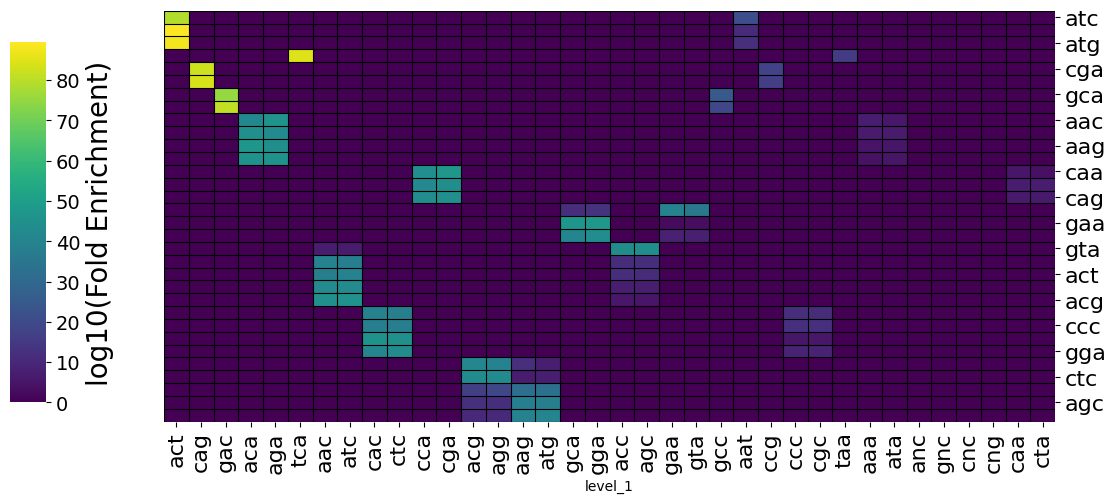

In [117]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

cg = sns.clustermap(
                data=transitions_pivot, 
                cmap="viridis",
                cbar_pos=(0.07, 0.15, 0.03, 0.6),
                figsize=(12, 6),
            )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False) 
ax = cg.ax_heatmap

ax.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax.set_ylabel('')
ax.tick_params(axis="y", rotation=0, labelsize=16)

cg.cax.set_ylabel("log10(Fold Enrichment)", fontsize=20)
cg.cax.tick_params(labelsize=14)


for i in range(len(transitions_pivot.columns) + 1):  # +1 to include the last edge
    ax.axvline(i, color="black", lw=0.8)
    ax.axhline(i, color="black", lw=0.8)


# Add significance values
# Get the reordered indices after clustering
row_order = cg.dendrogram_row.reordered_ind
col_order = cg.dendrogram_col.reordered_ind

# significance_values

# # Loop over each cell and add significance values
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         x = j + 0.5  # Adjust text position to center in cell
#         y = i + 0.5
#         sig = significance[row_order[i], col_order[j]]  # Get significance at correct position
#         g.ax_heatmap.text(x, y, sig, 
#                           ha="center", 
#                           va="center", 
#                           fontsize=15, 
#                           color="black")
fig = plt.gcf()
fig.savefig("/storage/group/izg5139/default/nicole/g4_t2t_analysis/figures/trinucleotide_mutation_model_transition_counts_general.png", 
            bbox_inches="tight")

## General Fold Enrichment Motif

In [118]:
mutated_g4_trinucleotides

,tri_mut_count
aac,9456
ccc,132858
agg,42868
cta,8690
acc,30240
taa,4629
caa,8999
tca,6052
cca,35109
cga,12741


In [121]:
trinucleotides_mutated

canonical_sequence,totalMutated,counts,mutation_bias
str,u32,i64,f64
"""gcc""",575756,3845366,0.149727
"""acg""",1197675,16502152,0.072577
"""ccg""",1025396,14322076,0.071595
"""cgc""",887884,14863494,0.059736
"""cga""",712311,13422601,0.053068
…,…,…,…
"""caa""",539234,117707971,0.004581
"""aag""",542510,121701801,0.004458
"""ctc""",413549,103263136,0.004005


In [124]:
base_trinucleotide_counts.head()

,base_g4_tri_counts
ccc,9592299
agg,4014274
gga,3839437
cca,3405173
ctc,3294378


In [ ]:
mutated_g4_enrichment = mutated_g4_trinucleotides.join(base_trinucleotide_counts, how="left")
mutated_g4_enrichment.loc[:, "mut_ratio"] = mutated_g4_enrichment["tri_mut_count"] / mutated_g4_enrichment["base_g4_tri_counts"]
mutated_g4_enrichment = pl.from_pandas(mutated_g4_enrichment.reset_index().rename(columns={"index": "canonical_sequence"}))
mutated_g4_enrichment = mutated_g4_enrichment.join(trinucleotides_mutated, 
                                                   on="canonical_sequence", 
                                                   how="full")\
                                    .with_columns(
                                                    (pl.col("mut_ratio") / pl.col("mutation_bias")).alias("Fold Enrichment")
                                    ).sort(['Fold Enrichment'], descending=True)

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency

def binom_test_func(row):
    return stats.binomtest(row["tri_mut_count"], 
                           row["base_g4_tri_counts"], 
                           row["mutation_bias"], 
                           
                        alternative='two-sided').pvalue

def contigency(row):
    array = np.array([[row['tri_mut_count'], row['base_g4_tri_counts'] - row['tri_mut_count']],
                      [row['totalMutated'], row['counts'] - row['totalMutated']]
                     ], dtype=np.int32)
    return chi2_contingency(array).pvalue

def map_stars(pval):
    if pval < 0.001:
        return "***"
    if pval < 0.01:
        return "**"
    if pval < 0.05:
        return "*"
    return "ns"

# Apply using map_elements
mutated_g4_enrichment = mutated_g4_enrichment.with_columns(
                pl.struct(["tri_mut_count", "base_g4_tri_counts", "totalMutated", "counts", "mutation_bias"])
                .map_elements(contigency, return_dtype=float)
                .alias("p_value")
)\
    .with_columns(
                (pl.col("p_value") * mutated_g4_enrichment.shape[0]).alias("adj_pvalue")
)\
    .with_columns(
            pl.col("adj_pvalue").map_elements(map_stars, return_dtype=str)
                .alias("significance")
    )\
    .with_columns(
            pl.col("adj_pvalue").map_elements(lambda pval: - math.log(pval+1, 10)).alias("-log(p-val)")
    )

p_values = list(mutated_g4_enrichment["p_value"])

mutated_g4_enrichment.to_pandas()

/tmp/ipykernel_2112261/3627308143.py:46: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(


,canonical_sequence,tri_mut_count,base_g4_tri_counts,mut_ratio,canonical_sequence_right,totalMutated,counts,mutation_bias,Fold Enrichment,p_value,adj_pvalue,significance,-log(p-val)
0,gaa,16092,1491314,0.010790,gaa,461795,133119514,0.003469,3.110523,0.000000e+00,0.000000e+00,***,-0.000000e+00
1,cta,8690,746996,0.011633,cta,383047,78407560,0.004885,2.381263,0.000000e+00,0.000000e+00,***,-0.000000e+00
2,ctc,30389,3294378,0.009225,ctc,413549,103263136,0.004005,2.303357,0.000000e+00,0.000000e+00,***,-0.000000e+00
3,aag,14813,1548432,0.009566,aag,542510,121701801,0.004458,2.146052,0.000000e+00,0.000000e+00,***,-0.000000e+00
4,aac,9456,816935,0.011575,aac,495353,90301575,0.005486,2.110088,0.000000e+00,0.000000e+00,***,-0.000000e+00
5,caa,8999,1056881,0.008515,caa,539234,117707971,0.004581,1.858646,0.000000e+00,0.000000e+00,***,-0.000000e+00
6,cac,29100,2389583,0.012178,cac,605405,92154056,0.006569,1.853699,0.000000e+00,0.000000e+00,***,-0.000000e+00
7,cca,35109,3405173,0.010310,cca,680230,118945537,0.005719,1.802900,0.000000e+00,0.000000e+00,***,-0.000000e+00
8,cag,21084,2240748,0.009409,cag,683211,122381328,0.005583,1.685467,0.000000e+00,0.000000e+00,***,-0.000000e+00
9,atc,8596,918734,0.009356,atc,472128,85038776,0.005552,1.685248,0.000000e+00,0.000000e+00,***,-0.000000e+00


In [132]:
mutated_g4_enrichment

canonical_sequence,tri_mut_count,base_g4_tri_counts,mut_ratio,canonical_sequence_right,totalMutated,counts,mutation_bias,Fold Enrichment
str,i64,i64,f64,str,u32,i64,f64,f64
"""gaa""",16092,1491314,0.01079,"""gaa""",461795,133119514,0.003469,3.110523
"""cta""",8690,746996,0.011633,"""cta""",383047,78407560,0.004885,2.381263
"""ctc""",30389,3294378,0.009225,"""ctc""",413549,103263136,0.004005,2.303357
"""aag""",14813,1548432,0.009566,"""aag""",542510,121701801,0.004458,2.146052
"""aac""",9456,816935,0.011575,"""aac""",495353,90301575,0.005486,2.110088
…,…,…,…,…,…,…,…,…
"""acg""",21445,328112,0.065359,"""acg""",1197675,16502152,0.072577,0.900545
"""cga""",12741,290911,0.043797,"""cga""",712311,13422601,0.053068,0.825297
"""cgc""",39041,831521,0.046951,"""cgc""",887884,14863494,0.059736,0.785982


In [3]:
mutated_g4_enrichment = pl.read_csv("/home/dollzeta/biolab/g4_t2t_identification/data/tri_model_out/trinucleotide_model_motif_enrichment_matrix.snp.csv")
mutated_g4_enrichment

canonical_sequence,tri_mut_count,base_tri_counts,mutagenicity,totalTimesMutated,gw_counts,mutagenicity_gw,fold_enrichment,p_value,adj_pvalue,significance
str,i64,i64,f64,i64,i64,f64,f64,f64,f64,str
"""GCC""",6055,575095,0.010529,575745,3845366,0.149724,0.070321,0.0,0.0,"""****"""
"""CCG""",13538,322052,0.042037,1025387,14322076,0.071595,0.587147,0.0,0.0,"""****"""
"""CGC""",8062,170525,0.047278,887859,14863494,0.059734,0.791465,1.7830e-103,5.7056e-102,"""****"""
"""ACG""",2825,45064,0.062689,1197657,16502152,0.072576,0.863767,6.9532e-16,2.2250e-14,"""****"""
"""CGA""",2050,40858,0.050174,712302,13422601,0.053067,0.945473,0.009477,0.303258,"""ns"""
…,…,…,…,…,…,…,…,…,…,…
"""AAG""",2835,176481,0.016064,542506,121701801,0.004458,3.603691,0.0,0.0,"""****"""
"""AAC""",2552,88575,0.028812,495346,90301575,0.005485,5.25238,0.0,0.0,"""****"""
"""GAA""",3284,166803,0.019688,461786,133119514,0.003469,5.675449,0.0,0.0,"""****"""


/tmp/ipykernel_2112261/2886668091.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="canonical_sequence",


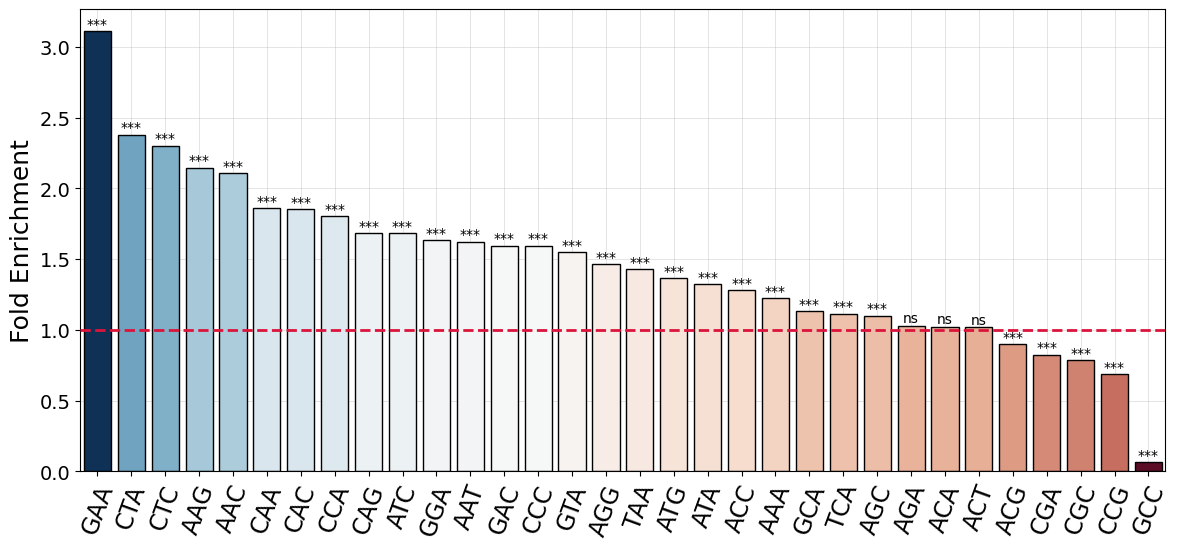

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
col = "Fold Enrichment"

mutated_g4_enrichment = mutated_g4_enrichment.sort([col], descending=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
norm = plt.Normalize(mutated_g4_enrichment[col].min(), mutated_g4_enrichment[col].max())
cmap = plt.cm.RdBu  # Choose a colormap

# Plot[
mutated_g4_enrichment = mutated_g4_enrichment.with_columns(pl.col("canonical_sequence").str.to_uppercase())

bars = sns.barplot(x="canonical_sequence", 
                   y="Fold Enrichment", 
                   data=mutated_g4_enrichment, 
                   ax=ax, 
                   linewidth=1.0 ,
                   edgecolor='black',
                   palette=[cmap(norm(v)) for v in mutated_g4_enrichment[col]])

# Add colorbar
sig_val = list(mutated_g4_enrichment["significance"])

# Loop over the bars and add a text value on top of each bar
for i, p in enumerate(bars.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(),  # Position of text
            f'{sig_val[i]}',  # Text value, formatted to 2 decimal places
            ha='center', va='bottom',  # Horizontal and vertical alignment
            fontsize=10)


# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label("-log(adjusted p-value)")

ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.tick_params(axis="x", labelsize=17, rotation=70)
ax.tick_params(axis="y", labelsize=14)
ax.yaxis.label.set_size(18)
ax.set_xlabel('')
ax.axhline(1.0, linestyle='--', color='crimson', lw=2.0, zorder=5)
ax.set_axisbelow(True)
figures = Path("/storage/group/izg5139/default/nicole/g4_t2t/figures/mutations")
figures.mkdir(exist_ok=True, parents=True)
fig.savefig(figures.joinpath("trinucleotide_mutation_model_SNP_generic.png"), bbox_inches="tight", dpi=400)

In [186]:
figures.joinpath("trinucleotide_mutation_model_SNP_generic.png")

PosixPath('/storage/group/izg5139/default/nicole/g4_t2t/figures/mutations/trinucleotide_mutation_model_SNP_generic.png')

## Compartments Analysis of Mutation Model

In [100]:
def count_base_counts(g4_df_exp):
    base_trinucleotide_counts = defaultdict(int)
    expanded_sequences = list(g4_df_exp["sequence"])
    for sequence in expanded_sequences:
        for i in range(len(sequence)-2):
            trinucleotide = sequence[i:i+3]
            rev_comp = str(Seq(trinucleotide).reverse_complement())
            if trinucleotide > rev_comp:
                trinucleotide = rev_comp
            base_trinucleotide_counts[trinucleotide] += 1
            
    base_trinucleotide_counts = pd.Series(base_trinucleotide_counts).to_frame('base_g4_tri_counts')
    return base_trinucleotide_counts

In [130]:
g4_to_snp_bed.head()

chr1	0	44	caccctaaaccctaacccctaaccctaaccctaaccctaaccct	chr1	16	19	C	A	3
 chr1	0	44	caccctaaaccctaacccctaaccctaaccctaaccctaaccct	chr1	7	10	A	C	3
 chr1	0	44	caccctaaaccctaacccctaaccctaaccctaaccctaaccct	chr1	24	27	T	A	3
 chr1	0	44	caccctaaaccctaacccctaaccctaaccctaaccctaaccct	chr1	17	20	C	A	3
 chr1	0	44	caccctaaaccctaacccctaaccctaaccctaaccctaaccct	chr1	20	23	A	C	3
 chr1	21	50	accctaaccctaaccctaaccctaaccct	chr1	47	50	C	G	3
 chr1	21	50	accctaaccctaaccctaaccctaaccct	chr1	24	27	T	A	3
 chr1	27	80	accctaaccctaaccctaaccctaacccctaaaccctaaccctaaccctaacc	chr1	51	54	C	A	3
 chr1	27	80	accctaaccctaaccctaaccctaacccctaaaccctaaccctaaccctaacc	chr1	47	50	C	G	3
 chr1	27	80	accctaaccctaaccctaaccctaacccctaaaccctaaccctaaccctaacc	chr1	56	59	A	T	3
 

In [131]:
g4_to_snp_compartments = pl.read_csv(
                            g4_to_snp_bed.intersect(compartments_bed, f=1.0, wo=True).fn,
                            has_header=False, 
                            separator="\t", 
                            new_columns=["seqID", "start", "end", "sequence", "chrom", "snp_start", "snp_end", "ref", "var", "snp_overlap", "chromosome", "comp_start", "comp_end", "compartment", "overlap"]
)
g4_to_snp_compartments

seqID,start,end,sequence,chrom,snp_start,snp_end,ref,var,snp_overlap,chromosome,comp_start,comp_end,compartment,overlap
str,i64,i64,str,str,i64,i64,str,str,i64,str,i64,i64,str,i64
"""chr1""",0,44,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",16,19,"""C""","""A""",3,"""chr1""",0,3000,"""Telomere""",44
"""chr1""",0,44,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",16,19,"""C""","""A""",3,"""chr1""",0,248387328,"""Genome""",44
"""chr1""",0,44,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",7,10,"""A""","""C""",3,"""chr1""",0,3000,"""Telomere""",44
"""chr1""",0,44,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",7,10,"""A""","""C""",3,"""chr1""",0,248387328,"""Genome""",44
"""chr1""",0,44,"""caccctaaaccctaacccctaaccctaacc…","""chr1""",24,27,"""T""","""A""",3,"""chr1""",0,3000,"""Telomere""",44
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrY""",26656930,26656961,"""aaagagtggggatgaggaggaaaggggcca…","""chrY""",26656955,26656958,"""T""","""C""",3,"""chrY""",0,62460029,"""Genome""",31
"""chrY""",26658481,26658508,"""gccacccaataaacccctacattccct""","""chrY""",26658487,26658490,"""T""","""A""",3,"""chrY""",0,62460029,"""Genome""",27
"""chrY""",26661877,26661908,"""aataaccactcccagccccatcacccaagt…","""chrY""",26661896,26661899,"""G""","""A""",3,"""chrY""",0,62460029,"""Genome""",31


In [98]:
g4_to_snp_compartments_bg = pl.read_csv(
                            g4_bed.intersect(compartments_bed, f=1.0, wo=True).fn,
                            has_header=False, 
                            separator="\t", 
                            new_columns=["seqID", "start", "end", "sequence", "chromosome", "comp_start", "comp_end", "compartment", "overlap"]
)
compartments = list(set(g4_to_snp_compartments_bg["compartment"]))

In [167]:
g4_to_snp_compartments.filter(pl.col("compartment") == "five_prime_UTR")

seqID,start,end,sequence,chrom,snp_start,snp_end,ref,var,snp_overlap,chromosome,comp_start,comp_end,compartment,biotype,overlap
str,i64,i64,str,str,i64,i64,str,str,i64,str,i64,i64,str,str,i64
"""chr1""",390060,390089,"""ctgacccgcccgcctcctgcagccccgag""","""chr1""",390065,390068,"""C""","""T""",3,"""chr1""",389916,390131,"""five_prime_UTR""","""protein_coding""",29
"""chr1""",464387,464418,"""cccggggaggctgtgggcagcaggggtggc…","""chr1""",464413,464416,"""G""","""A""",3,"""chr1""",464128,464691,"""five_prime_UTR""","""protein_coding""",31
"""chr1""",657246,657318,"""ccatggggcgggctgcagggtgtgggccag…","""chr1""",657254,657257,"""G""","""A""",3,"""chr1""",657229,657403,"""five_prime_UTR""","""protein_coding""",72
"""chr1""",737705,737744,"""gcacctactgcagccccacagcccccataa…","""chr1""",737730,737733,"""A""","""G""",3,"""chr1""",736277,738794,"""five_prime_UTR""","""protein_coding""",39
"""chr1""",791969,792021,"""gtggtggagggaatgagacaggggtggggg…","""chr1""",791993,791996,"""G""","""C""",3,"""chr1""",791820,792356,"""five_prime_UTR""","""protein_coding""",52
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chrX""",152309941,152309987,"""gcaggtggattagtgtgggggtgaggggca…","""chrX""",152309970,152309973,"""A""","""G""",3,"""chrX""",152307604,152310542,"""five_prime_UTR""","""protein_coding""",46
"""chrX""",152694820,152694860,"""cgcttggggcccggggcgcggggcgaggcc…","""chrX""",152694822,152694825,"""T""","""G""",3,"""chrX""",152694790,152694938,"""five_prime_UTR""","""protein_coding""",40
"""chrX""",152695386,152695426,"""gcctccccaggtctccctcccgacctgtcc…","""chrX""",152695406,152695409,"""G""","""A""",3,"""chrX""",152695016,152696693,"""five_prime_UTR""","""protein_coding""",40


In [168]:
from tqdm import tqdm
from Bio.Seq import Seq
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

def count_base_counts(g4_df_exp):
    base_trinucleotide_counts = defaultdict(int)
    expanded_sequences = list(g4_df_exp["sequence"])
    for sequence in expanded_sequences:
        for i in range(len(sequence)-2):
            trinucleotide = sequence[i:i+3]
            rev_comp = str(Seq(trinucleotide).reverse_complement())
            if trinucleotide > rev_comp:
                trinucleotide = rev_comp
                
            base_trinucleotide_counts[trinucleotide] += 1
    base_trinucleotide_counts = pd.Series(base_trinucleotide_counts).to_frame('base_g4_tri_counts')
    return base_trinucleotide_counts
    
compartments = list(set(g4_to_snp_compartments["compartment"]))
mutated_g4_trinucleotides_comp = defaultdict(lambda: defaultdict(int))
mutated_g4_trinucleotides_comp = defaultdict(int)

def annotate_significance(pval):
    if pval < 0.005:
        return "***"
    if pval < 0.01:
        return "**"
    if pval < 0.05:
        return "*"
    return "ns"
    
    
def binom_test_func(row):
    return stats.binomtest(row["tri_mut_count"], 
                           row["base_g4_tri_counts"], 
                           row["mutation_bias"], 
                           alternative='two-sided').pvalue

mutated_g4_enrichment_comp_collection = []
for compartment in tqdm(compartments):
    
    if compartment in {"Promoter", "Gene", "Exon"}:
        biotypes = ["protein_coding", "non_coding"]
    else:
        biotypes = ["."]
        
    for biotype in biotypes:
        mutated_g4_trinucleotides_comp = defaultdict(int)
    
        # step I
        # calculate mutation ratio within compartment
        temp_df = g4_to_snp_compartments.filter(pl.col("compartment") == compartment)\
                                        .unique(["seqID", "start", "end", "snp_start", "snp_end", "ref", "var"])
        if biotype != ".":
            temp_df = temp_df.filter(pl.col("biotype") == biotype)
        
        for row in temp_df.iter_rows(named=True):
            start = row['start']
            end = row['end']
            sequence = row['sequence']
        
            snp_start = row['snp_start']
            snp_end = row['snp_end']
        
            ref = row['ref']
            var = row['var']
        
            rel_start = snp_start - start
            rel_end = snp_end - start
            assert rel_start >= 0 and rel_end >= 0
            
            mutated_chunk = sequence[rel_start: rel_end]
            assert len(mutated_chunk) == 3
            
            reverse_comp = str(Seq(mutated_chunk).reverse_complement())
            if mutated_chunk > reverse_comp:
                mutated_chunk = reverse_comp
            mutated_g4_trinucleotides_comp[mutated_chunk] += 1
    
        ## step II
        ## calculate trinucleotide counts of G4 within that compartment
        bg_tri_counts = count_base_counts(temp_df.unique(["seqID", "start", "end"]))
        mutated_g4_trinucleotides_comp = pd.Series(mutated_g4_trinucleotides_comp).to_frame(name='tri_mut_count').fillna(0.0)
        mutated_g4_enrichment_comp = mutated_g4_trinucleotides_comp.join(bg_tri_counts, how="left")
        mutated_g4_enrichment_comp.loc[:, "mut_ratio"] = mutated_g4_enrichment_comp["tri_mut_count"] / mutated_g4_enrichment_comp["base_g4_tri_counts"]
        mutated_g4_enrichment_comp = pl.from_pandas(mutated_g4_enrichment_comp.reset_index().rename(columns={"index": "canonical_sequence"}))
        mutated_g4_enrichment_comp = mutated_g4_enrichment_comp.join(trinucleotides_mutated, 
                                                                     on="canonical_sequence", 
                                                                     how="full")\
                                            .with_columns(
                                                            (pl.col("mut_ratio") / pl.col("mutation_bias")).alias("Fold Enrichment")
                                            ).sort(['Fold Enrichment'], descending=True)
    
    
        if mutated_g4_enrichment_comp.filter(pl.col("base_g4_tri_counts").is_null()).shape[0] > 0:
            print(f"Skipping compartment `{compartment}`")
            continue
        print(compartment, biotype)

        # Step III
        # perform statistical analysis
    
        ## Step IV
        ## Apply using map_elements and evaluate statistical significance
        mutated_g4_enrichment_comp = mutated_g4_enrichment_comp.with_columns(
                                                                pl.struct(["tri_mut_count", "base_g4_tri_counts", "totalMutated", "counts", "mutation_bias"])
                                                                .map_elements(contigency, return_dtype=float)
                                                                .alias("p_value")
                                                )\
                                                .with_columns(
                                                                (pl.col("p_value") * mutated_g4_enrichment.shape[0]).alias("adj_pvalue")
                                                )\
                                        .with_columns(
                                                        pl.col("adj_pvalue").map_elements(map_stars, return_dtype=str)
                                                            .alias("significance")
                                                )\
                                        .with_columns(
                                                pl.col("adj_pvalue").map_elements(annotate_significance, return_dtype=str).alias("sig_stars")
                                        )\
                                        .with_columns(
                                                    pl.lit(compartment).alias("compartment"),
                                                    pl.lit(biotype).alias("biotype")
                                        )
        p_values = list(mutated_g4_enrichment["p_value"])
        mutated_g4_enrichment_comp_collection.append(mutated_g4_enrichment_comp)
    

# mutated_g4_trinucleotides_comp = pd.DataFrame(mutated_g4_trinucleotides_comp)
# mutated_g4_trinucleotides_comp
mutated_g4_enrichment_comp_collection = pl.concat(mutated_g4_enrichment_comp_collection)
mutated_g4_enrichment_comp_collection

 10%|█         | 2/20 [00:00<00:04,  3.62it/s]

five_prime_UTR .
bsat .


 15%|█▌        | 3/20 [00:01<00:07,  2.37it/s]

three_prime_UTR .
Skipping compartment `dhor`
hsat3 .
Skipping compartment `hor`


 35%|███▌      | 7/20 [00:02<00:05,  2.47it/s]

enhancer .
Gene protein_coding


 40%|████      | 8/20 [00:21<00:50,  4.18s/it]

Gene non_coding
Skipping compartment `hsat2`


 50%|█████     | 10/20 [00:21<00:26,  2.69s/it]

CDS .
Promoter protein_coding


 60%|██████    | 12/20 [00:23<00:15,  1.90s/it]

Promoter non_coding
censat .
mon .


 70%|███████   | 14/20 [00:23<00:07,  1.20s/it]

Skipping compartment `Telomere`
Skipping compartment `rDNA`


 80%|████████  | 16/20 [00:25<00:04,  1.16s/it]

ct .


 85%|████████▌ | 17/20 [00:27<00:03,  1.15s/it]

SVA .
Skipping compartment `gsat`


 95%|█████████▌| 19/20 [00:27<00:00,  1.23it/s]

Alu .
Exon protein_coding


100%|██████████| 20/20 [00:29<00:00,  1.47s/it]

Exon non_coding


canonical_sequence,tri_mut_count,base_g4_tri_counts,mut_ratio,canonical_sequence_right,totalMutated,counts,mutation_bias,Fold Enrichment,p_value,adj_pvalue,significance,sig_stars,compartment,biotype
str,i64,i64,f64,str,u32,i64,f64,f64,f64,f64,str,str,str,str
"""caa""",87,3120,0.027885,"""caa""",539234,117707971,0.004581,6.086859,3.8090e-79,1.2189e-77,"""***""","""***""","""five_prime_UTR""","""."""
"""aac""",80,2525,0.031683,"""aac""",495353,90301575,0.005486,5.77576,1.5332e-67,4.9063e-66,"""***""","""***""","""five_prime_UTR""","""."""
"""aat""",50,1545,0.032362,"""aat""",963773,163578363,0.005892,5.492785,1.1968e-39,3.8298e-38,"""***""","""***""","""five_prime_UTR""","""."""
"""gaa""",90,4823,0.018661,"""gaa""",461795,133119514,0.003469,5.379201,1.5987e-69,5.1159e-68,"""***""","""***""","""five_prime_UTR""","""."""
"""cca""",345,11266,0.030623,"""cca""",680230,118945537,0.005719,5.354781,9.6346e-259,3.0831e-257,"""***""","""***""","""five_prime_UTR""","""."""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""acg""",466,3108,0.149936,"""acg""",1197675,16502152,0.072577,2.065887,3.6969e-50,1.1830e-48,"""***""","""***""","""Exon""","""non_coding"""
"""cga""",294,2825,0.104071,"""cga""",712311,13422601,0.053068,1.961083,6.6902e-29,2.1409e-27,"""***""","""***""","""Exon""","""non_coding"""
"""cgc""",889,8860,0.100339,"""cgc""",887884,14863494,0.059736,1.679704,4.5948e-50,1.4703e-48,"""***""","""***""","""Exon""","""non_coding"""


In [179]:
mutated_g4_enrichment_comp_collection["significance"].value_counts()

significance,count
str,u32
"""*""",4
"""**""",6
"""ns""",18
"""***""",516


In [171]:
mutated_g4_enrichment_comp_collection = mutated_g4_enrichment_comp_collection.with_columns(comp=pl.col("compartment") + "," + pl.col("biotype"))

mutated_g4_enrichment_comp_pivot = mutated_g4_enrichment_comp_collection.pivot(index="comp", values="Fold Enrichment", on="canonical_sequence")
mutated_g4_enrichment_comp_pivot = mutated_g4_enrichment_comp_pivot.to_pandas().set_index("comp")
mutated_g4_enrichment_comp_pivot

,caa,aac,aat,gaa,cca,cta,ctc,gta,aag,gac,...,tca,acc,aga,aca,gca,cga,acg,ccg,cgc,gcc
comp,,,,,,,,,,,,,,,,,,,,,
"five_prime_UTR,.",6.086859,5.775760,5.492785,5.379201,5.354781,5.140036,4.874552,4.823731,4.612579,4.542199,...,3.188991,3.185550,3.138367,3.104048,2.796629,1.043318,0.876913,0.849557,0.771653,0.179947
"bsat,.",13.427486,10.370587,6.300773,6.386792,5.399262,12.321408,12.211507,10.378605,10.471882,7.643355,...,4.687951,4.368843,3.142611,3.592021,3.959582,1.705251,1.964039,1.941528,2.510753,0.324888
"three_prime_UTR,.",5.568555,5.003657,5.301039,4.785832,5.259716,4.842583,4.238458,4.223769,5.143299,3.437576,...,3.096416,3.427697,3.102724,3.082227,2.982331,2.421650,1.987752,1.866192,2.314418,0.171089
"hsat3,.",7.995874,7.011439,7.358458,5.002034,6.674946,6.250209,3.955642,9.715368,10.139253,4.400209,...,5.543216,3.082595,7.652209,5.980402,14.977457,2.291806,3.543040,2.875633,4.986489,0.205502
"enhancer,.",5.585555,5.504978,5.346544,5.645751,4.978119,5.402866,5.121499,5.330780,4.989628,4.143700,...,3.066417,3.471251,3.015690,2.754195,2.906432,1.903757,1.779362,1.414153,1.501618,0.180633
"Gene,protein_coding",6.232253,5.881020,5.632302,9.356209,5.615323,5.196282,6.537744,5.150099,6.915050,4.619152,...,3.285049,3.847203,3.277524,3.009573,3.447445,2.202788,2.231703,1.651872,2.040579,0.191776
"Gene,non_coding",5.974181,5.989492,5.397447,9.475290,5.875891,5.082033,6.740723,5.503096,6.948305,4.739172,...,3.796752,3.849223,3.053173,2.848982,3.734653,2.541818,2.546525,1.847269,2.410710,0.210968
"CDS,.",4.999667,5.764345,6.538023,6.354345,4.226772,10.287931,4.214470,4.187959,4.429974,4.924396,...,3.147374,2.868058,2.846012,2.528219,3.289531,1.348585,1.772001,1.225062,1.302655,0.171818
"Promoter,protein_coding",6.511300,6.380796,4.770965,6.477874,4.434440,6.677139,6.242986,6.404108,5.374596,5.451163,...,2.783263,3.180126,2.931929,3.156564,3.098869,1.013682,0.758134,0.689942,0.730101,0.169790


In [172]:
significance_values = mutated_g4_enrichment_comp_collection.to_pandas().set_index(["canonical_sequence", "compartment"])["sig_stars"].to_dict()
# significance_values

In [173]:
mutated_g4_enrichment_comp_pivot
for col in mutated_g4_enrichment_comp_pivot:
    mutated_g4_enrichment_comp_pivot[col] = mutated_g4_enrichment_comp_pivot[col].apply(math.log)

In [174]:
trinucleotides_mutated

canonical_sequence,totalMutated,counts,mutation_bias
str,u32,i64,f64
"""gcc""",575756,3845366,0.149727
"""acg""",1197675,16502152,0.072577
"""ccg""",1025396,14322076,0.071595
"""cgc""",887884,14863494,0.059736
"""cga""",712311,13422601,0.053068
…,…,…,…
"""caa""",539234,117707971,0.004581
"""aag""",542510,121701801,0.004458
"""ctc""",413549,103263136,0.004005


In [175]:
trinucleotides_mutated.write_csv("/storage/group/izg5139/default/nicole/g4_t2t_analysis/datasets/base_mutation_ratio_trinucleotide_model.new.csv")

In [188]:
mutated_g4_enrichment_comp_pivot.index = mutated_g4_enrichment_comp_pivot.index.map(lambda x: x.split(",")[0] if "." in x else x)
mapping = {"Exon,protein_coding": "Protein Coding Exon",
           "Exon,non_coding": "Non Coding Exon",
           "Promoter,non_coding": "Non Coding Promoter",
           "Promoter,protein_coding": "Protein Coding Promoter",
           "Gene,non_coding": "Non Coding Gene",
           "Gene,protein_coding": "Protein Coding Gene",
           "five_prime_UTR": "5' UTR",
           "three_prime_UTR": "3' UTR",
          }
mutated_g4_enrichment_comp_pivot.index = mutated_g4_enrichment_comp_pivot.index.map(lambda x: mapping.get(x, x))
mutated_g4_enrichment_comp_pivot
mutated_g4_enrichment_comp_pivot

,caa,aac,aat,gaa,cca,cta,ctc,gta,aag,gac,...,tca,acc,aga,aca,gca,cga,acg,ccg,cgc,gcc
comp,,,,,,,,,,,,,,,,,,,,,
five_prime_UTR,1.806132,1.753670,1.703435,1.682540,1.677990,1.637060,1.584028,1.573548,1.528787,1.513411,...,1.159704,1.158625,1.143702,1.132707,1.028415,0.042406,-0.131348,-0.163040,-0.259221,-1.715091
bsat,2.597304,2.338974,1.840672,1.854232,1.686262,2.511338,2.502379,2.339747,2.348694,2.033837,...,1.544996,1.474498,1.145054,1.278715,1.376138,0.533712,0.675003,0.663475,0.920583,-1.124274
three_prime_UTR,1.717136,1.610169,1.667903,1.565660,1.660077,1.577448,1.444200,1.440728,1.637695,1.234767,...,1.130245,1.231888,1.132280,1.125653,1.092705,0.884449,0.687004,0.623900,0.839158,-1.765569
hsat3,2.078926,1.947543,1.995850,1.609845,1.898361,1.832615,1.375143,2.273709,2.316414,1.481652,...,1.712575,1.125772,2.034994,1.788488,2.706546,0.829340,1.264985,1.056273,1.606732,-1.582300
enhancer,1.720184,1.705653,1.676450,1.730903,1.605052,1.686930,1.633447,1.673498,1.607361,1.421589,...,1.120510,1.244515,1.103829,1.013125,1.066926,0.643830,0.576255,0.346530,0.406544,-1.711288
"Gene,protein_coding",1.829738,1.771730,1.728518,2.236040,1.725499,1.647943,1.877592,1.639016,1.933700,1.530211,...,1.189382,1.347346,1.187088,1.101798,1.237633,0.789724,0.802765,0.501909,0.713233,-1.651428
"Gene,non_coding",1.787447,1.790007,1.685926,2.248687,1.770858,1.625711,1.908167,1.705311,1.938498,1.555862,...,1.334146,1.347871,1.116181,1.046962,1.317655,0.932880,0.934730,0.613708,0.879921,-1.556050
CDS,1.609371,1.751692,1.877635,1.849139,1.441439,2.330971,1.438524,1.432214,1.488394,1.594202,...,1.146568,1.053635,1.045919,0.927515,1.190745,0.299056,0.572110,0.202991,0.264404,-1.761318
"Promoter,protein_coding",1.873539,1.853293,1.562549,1.868392,1.489401,1.898690,1.831459,1.856940,1.681683,1.695829,...,1.023624,1.156921,1.075660,1.149484,1.131037,0.013589,-0.276895,-0.371147,-0.314573,-1.773192


In [190]:
mapping = {"Exon,protein_coding": "Protein Coding Exon",
           "Exon,non_coding": "Non Coding Exon",
           "Promoter,non_coding": "Non Coding Promoter",
           "Promoter,protein_coding": "Protein Coding Promoter",
           "Gene,non_coding": "Non Coding Gene",
           "Gene,protein_coding": "Protein Coding Gene",
           "five_prime_UTR": "5' UTR",
           "three_prime_UTR": "3' UTR",
          }
mutated_g4_enrichment_comp_pivot.index = mutated_g4_enrichment_comp_pivot.index.map(lambda x: mapping.get(x, x))
mutated_g4_enrichment_comp_pivot

,caa,aac,aat,gaa,cca,cta,ctc,gta,aag,gac,...,tca,acc,aga,aca,gca,cga,acg,ccg,cgc,gcc
comp,,,,,,,,,,,,,,,,,,,,,
5' UTR,1.806132,1.753670,1.703435,1.682540,1.677990,1.637060,1.584028,1.573548,1.528787,1.513411,...,1.159704,1.158625,1.143702,1.132707,1.028415,0.042406,-0.131348,-0.163040,-0.259221,-1.715091
bsat,2.597304,2.338974,1.840672,1.854232,1.686262,2.511338,2.502379,2.339747,2.348694,2.033837,...,1.544996,1.474498,1.145054,1.278715,1.376138,0.533712,0.675003,0.663475,0.920583,-1.124274
3' UTR,1.717136,1.610169,1.667903,1.565660,1.660077,1.577448,1.444200,1.440728,1.637695,1.234767,...,1.130245,1.231888,1.132280,1.125653,1.092705,0.884449,0.687004,0.623900,0.839158,-1.765569
hsat3,2.078926,1.947543,1.995850,1.609845,1.898361,1.832615,1.375143,2.273709,2.316414,1.481652,...,1.712575,1.125772,2.034994,1.788488,2.706546,0.829340,1.264985,1.056273,1.606732,-1.582300
enhancer,1.720184,1.705653,1.676450,1.730903,1.605052,1.686930,1.633447,1.673498,1.607361,1.421589,...,1.120510,1.244515,1.103829,1.013125,1.066926,0.643830,0.576255,0.346530,0.406544,-1.711288
Protein Coding Gene,1.829738,1.771730,1.728518,2.236040,1.725499,1.647943,1.877592,1.639016,1.933700,1.530211,...,1.189382,1.347346,1.187088,1.101798,1.237633,0.789724,0.802765,0.501909,0.713233,-1.651428
Non Coding Gene,1.787447,1.790007,1.685926,2.248687,1.770858,1.625711,1.908167,1.705311,1.938498,1.555862,...,1.334146,1.347871,1.116181,1.046962,1.317655,0.932880,0.934730,0.613708,0.879921,-1.556050
CDS,1.609371,1.751692,1.877635,1.849139,1.441439,2.330971,1.438524,1.432214,1.488394,1.594202,...,1.146568,1.053635,1.045919,0.927515,1.190745,0.299056,0.572110,0.202991,0.264404,-1.761318
Protein Coding Promoter,1.873539,1.853293,1.562549,1.868392,1.489401,1.898690,1.831459,1.856940,1.681683,1.695829,...,1.023624,1.156921,1.075660,1.149484,1.131037,0.013589,-0.276895,-0.371147,-0.314573,-1.773192


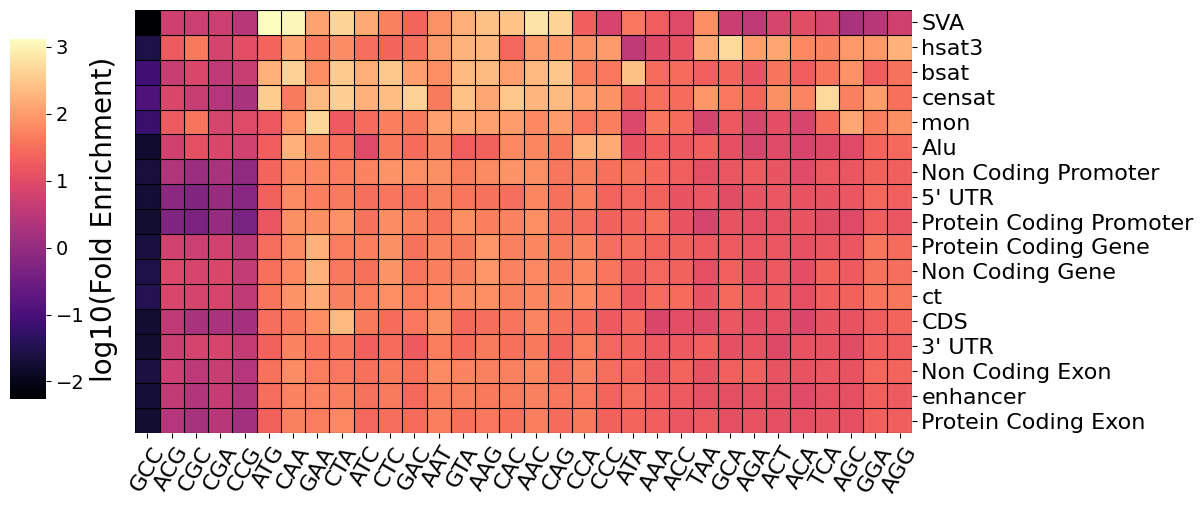

In [193]:
import math

mutated_g4_enrichment_comp_pivot.columns = [col.upper() for col in mutated_g4_enrichment_comp_pivot.columns]
cg = sns.clustermap(
                data=mutated_g4_enrichment_comp_pivot, 
                cmap="magma",
                cbar_pos=(0.07, 0.15, 0.03, 0.6),
                figsize=(12, 6),
            )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False) 
ax = cg.ax_heatmap

ax.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax.set_ylabel('')
ax.tick_params(axis="y", rotation=0, labelsize=16)
ax.tick_params(axis="x", rotation=60, labelsize=16)

cg.cax.set_ylabel("log10(Fold Enrichment)", fontsize=20)
cg.cax.tick_params(labelsize=14)


for i in range(len(mutated_g4_enrichment_comp_pivot.columns) + 1):  # +1 to include the last edge
    ax.axvline(i, color="black", lw=0.8)
    ax.axhline(i, color="black", lw=0.8)


# Add significance values
# Get the reordered indices after clustering
row_order = cg.dendrogram_row.reordered_ind
col_order = cg.dendrogram_col.reordered_ind

# significance_values

# # Loop over each cell and add significance values
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         x = j + 0.5  # Adjust text position to center in cell
#         y = i + 0.5
#         sig = significance[row_order[i], col_order[j]]  # Get significance at correct position
#         g.ax_heatmap.text(x, y, sig, 
#                           ha="center", 
#                           va="center", 
#                           fontsize=15, 
#                           color="black")
fig = plt.gcf()
fig.savefig("/storage/group/izg5139/default/nicole/g4_t2t_analysis/figures/trinucleotide_mutation_model_compartment_enrichment.png", bbox_inches="tight")

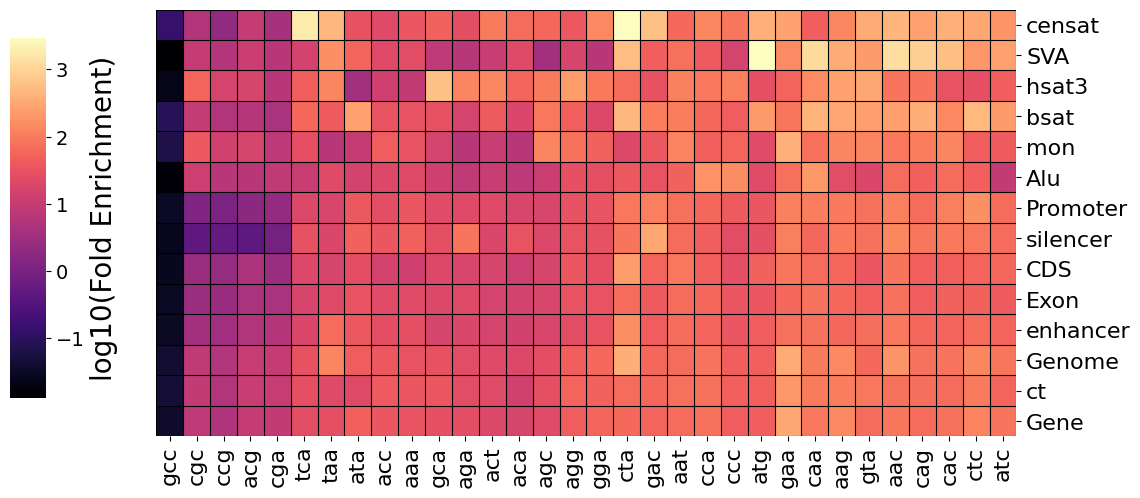

In [247]:
import math
cg = sns.clustermap(
                data=mutated_g4_enrichment_comp_pivot, 
                cmap="magma",
                cbar_pos=(0.07, 0.15, 0.03, 0.6),
                figsize=(12, 6),
            )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False) 
ax = cg.ax_heatmap

ax.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax.set_ylabel('')
ax.tick_params(axis="y", rotation=0, labelsize=16)

cg.cax.set_ylabel("log10(Fold Enrichment)", fontsize=20)
cg.cax.tick_params(labelsize=14)


for i in range(len(mutated_g4_enrichment_comp_pivot.columns) + 1):  # +1 to include the last edge
    ax.axvline(i, color="black", lw=0.8)
    ax.axhline(i, color="black", lw=0.8)


# Add significance values
# Get the reordered indices after clustering
row_order = cg.dendrogram_row.reordered_ind
col_order = cg.dendrogram_col.reordered_ind

# significance_values

# # Loop over each cell and add significance values
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         x = j + 0.5  # Adjust text position to center in cell
#         y = i + 0.5
#         sig = significance[row_order[i], col_order[j]]  # Get significance at correct position
#         g.ax_heatmap.text(x, y, sig, 
#                           ha="center", 
#                           va="center", 
#                           fontsize=15, 
#                           color="black")
fig = plt.gcf()
fig.savefig("/storage/group/izg5139/default/nicole/g4_t2t_analysis/figures/trinucleotide_mutation_model_compartment_enrichment.magma.png", bbox_inches="tight")

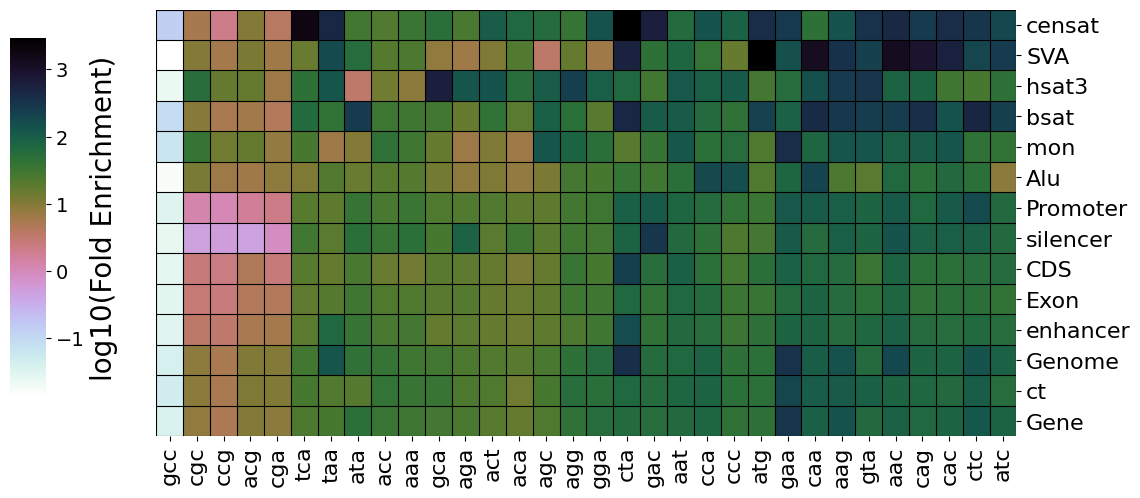

In [250]:
import math
cg = sns.clustermap(
                data=mutated_g4_enrichment_comp_pivot, 
                cmap="cubehelix_r",
                cbar_pos=(0.07, 0.15, 0.03, 0.6),
                figsize=(12, 6),
            )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False) 
ax = cg.ax_heatmap

ax.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax.set_ylabel('')
ax.tick_params(axis="y", rotation=0, labelsize=16)

cg.cax.set_ylabel("log10(Fold Enrichment)", fontsize=20)
cg.cax.tick_params(labelsize=14)


for i in range(len(mutated_g4_enrichment_comp_pivot.columns) + 1):  # +1 to include the last edge
    ax.axvline(i, color="black", lw=0.8)
    ax.axhline(i, color="black", lw=0.8)


# Add significance values
# Get the reordered indices after clustering
row_order = cg.dendrogram_row.reordered_ind
col_order = cg.dendrogram_col.reordered_ind

# significance_values

# # Loop over each cell and add significance values
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         x = j + 0.5  # Adjust text position to center in cell
#         y = i + 0.5
#         sig = significance[row_order[i], col_order[j]]  # Get significance at correct position
#         g.ax_heatmap.text(x, y, sig, 
#                           ha="center", 
#                           va="center", 
#                           fontsize=15, 
#                           color="black")
fig = plt.gcf()
fig.savefig("/storage/group/izg5139/default/nicole/g4_t2t_analysis/figures/trinucleotide_mutation_model_compartment_enrichment.cubehelix.png", bbox_inches="tight")